In [5]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu




## Erdős–Rényi Model

Create undirected random networks with n = 1000 nodes, and the probability p for drawing an edge between two arbitrary vertices 0.003, 0.004, 0.01, 0.05, and 0.1. Plot the degree distributions.

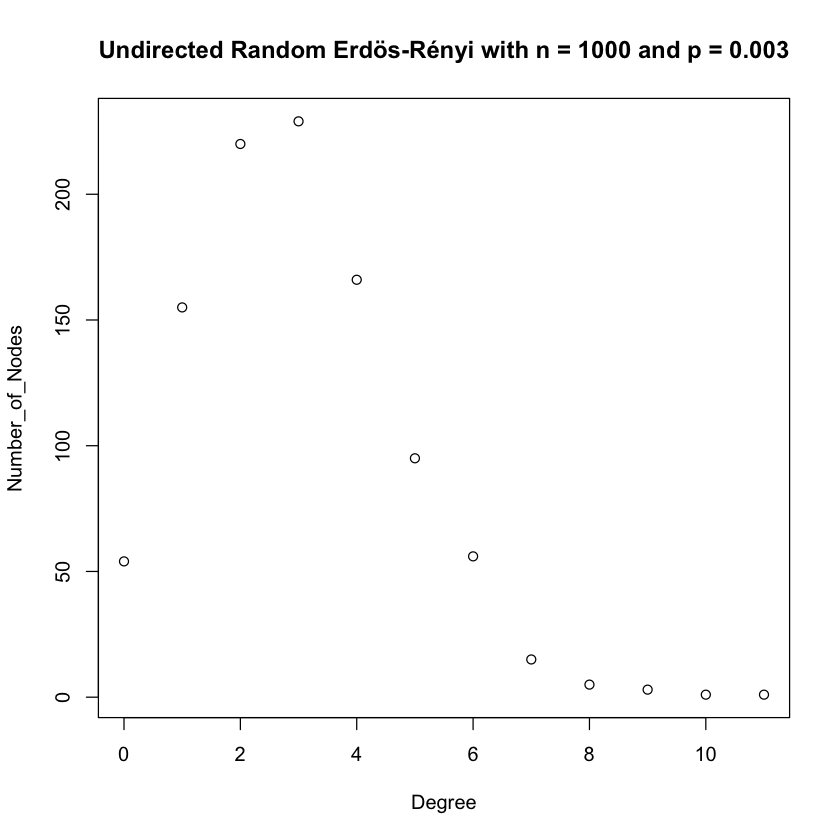

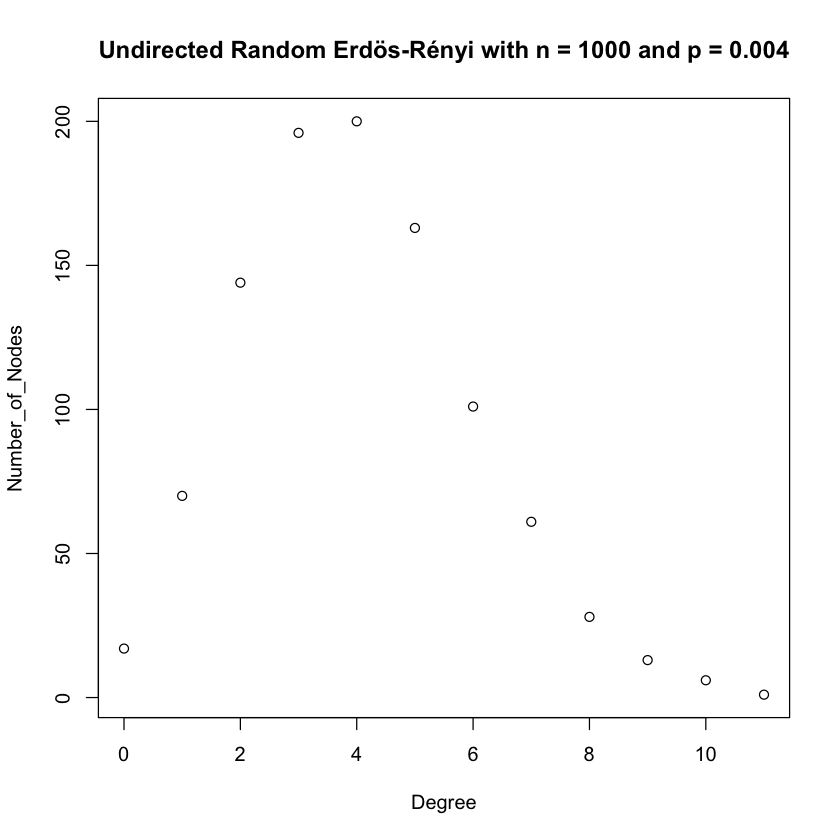

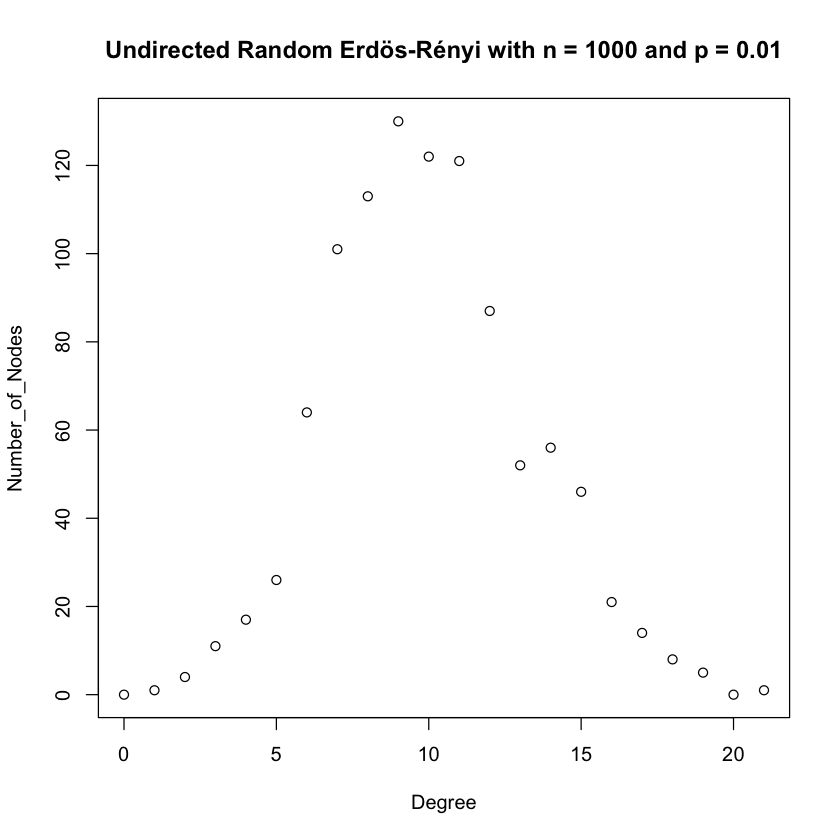

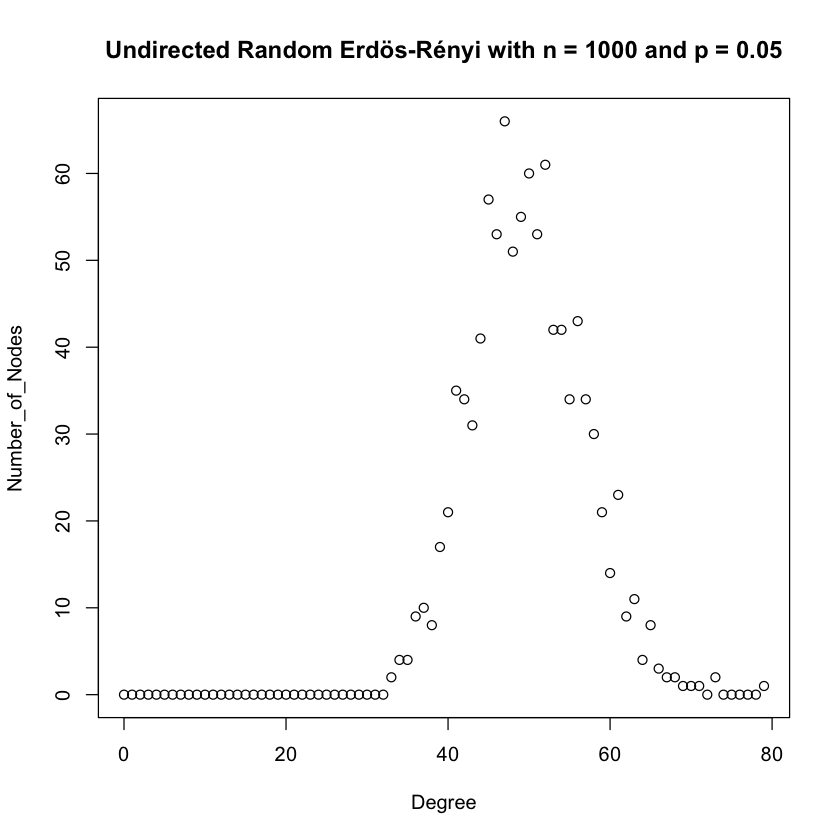

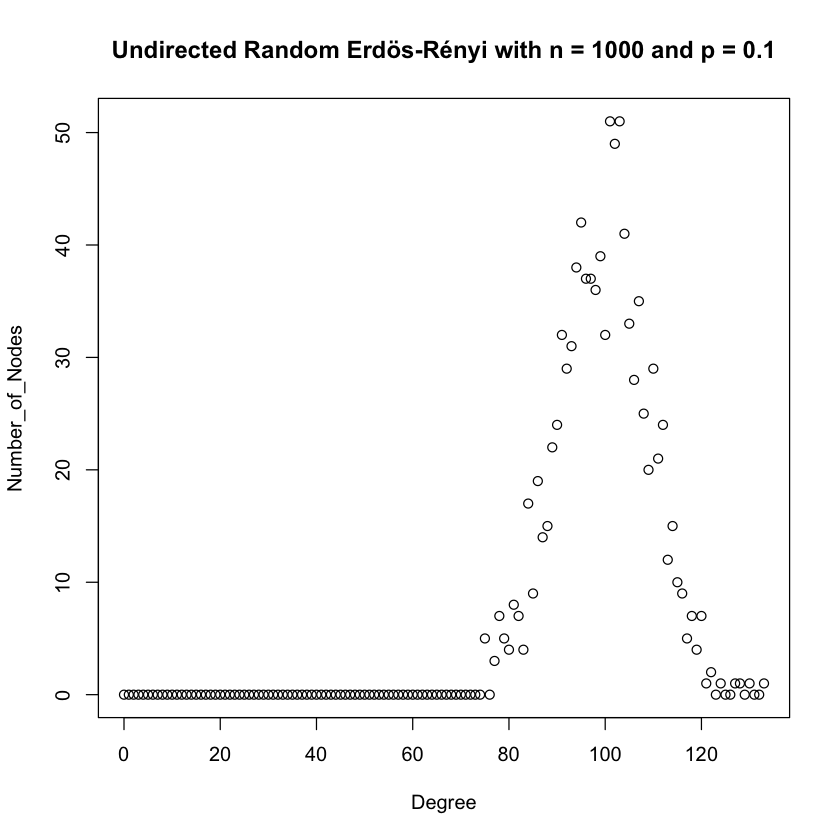

In [130]:
n = 1000
prob_list = c(0.003, 0.004, 0.01, 0.05, 0.1)
prob_len = length(prob_list)
dd_list = list(1:prob_len)
g_list = list(1:prob_len)
for (i in 1:prob_len){
    g_np = sample_gnp(n=n, p=prob_list[i], directed = FALSE)
    g_list[[i]] = g_np 
    dd = degree_distribution(g_np) * n
    dd_list[[i]] = dd 
    dd.data = data.frame(
       Degree = 0:(length(dd)-1),
        Number_of_Nodes = dd
)
    
    plot(dd.data, main = paste0("Undirected Random Erdös-Rényi with n = 1000 and p = ", prob_list[i]))
}

What distribution is observed? Explain why. 

In [116]:
for (i in 1:prob_len){
    cat("degree distribution for p =", prob_list[i], ":", dd_list[[i]], "\n")
    }

degree distribution for p = 0.003 : 45 155 230 209 153 110 63 21 11 3 
degree distribution for p = 0.004 : 14 72 130 181 189 166 109 71 39 18 6 2 3 
degree distribution for p = 0.01 : 0 0 3 9 32 44 63 85 120 135 118 116 89 65 55 31 14 13 1 4 2 0 1 
degree distribution for p = 0.05 : 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 1 2 8 9 11 17 13 18 34 20 25 46 34 45 65 62 57 60 60 53 42 45 36 49 33 31 23 21 13 19 13 10 4 5 2 1 1 6 1 
degree distribution for p = 0.1 : 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 4 0 2 5 8 6 10 10 15 23 20 16 22 21 26 36 40 48 35 47 51 32 42 51 34 35 38 26 25 30 26 35 26 22 22 18 14 11 21 6 5 8 6 4 3 0 1 2 0 2 1 2 0 2 0 0 0 0 0 0 1 


Also, report the mean and variance of the degree distributions and compare them to the theoretical values.

In [129]:
for (i in 1:prob_len){
    mu = dot(dd_list[[i]], c(0:(length(dd_list[[i]])-1))) /  n
    dd_var = dot((c(0:(length(dd_list[[i]])-1)) - mu)^2, dd_list[[i]]) / n
    th_mu = n*prob_list[i]
    th_dd_var = n*prob_list[i]*(1 - prob_list[i])
    cat("mean degree and variance for p =", prob_list[i], ":", mu, "and" , dd_var, "\n")
    cat("binomial mean degree and variance for p =", prob_list[i], ":", th_mu, "and" , th_dd_var, "\n")
    cat("poisson mean degree and variance for p =", prob_list[i], ":", th_mu, "and" , th_mu, "\n")
    print(data.frame(mean=c(mu, th_mu, th_mu), var=c(dd_var, th_dd_var, th_mu)))
}

mean degree and variance for p = 0.003 : 2.982 and 2.865676 
binomial mean degree and variance for p = 0.003 : 3 and 2.991 
poisson mean degree and variance for p = 0.003 : 3 and 3 
   mean      var
1 2.982 2.865676
2 3.000 2.991000
3 3.000 3.000000
mean degree and variance for p = 0.004 : 3.864 and 3.631504 
binomial mean degree and variance for p = 0.004 : 4 and 3.984 
poisson mean degree and variance for p = 0.004 : 4 and 4 
   mean      var
1 3.864 3.631504
2 4.000 3.984000
3 4.000 4.000000
mean degree and variance for p = 0.01 : 10.004 and 9.621984 
binomial mean degree and variance for p = 0.01 : 10 and 9.9 
poisson mean degree and variance for p = 0.01 : 10 and 10 
    mean       var
1 10.004  9.621984
2 10.000  9.900000
3 10.000 10.000000
mean degree and variance for p = 0.05 : 49.964 and 48.8967 
binomial mean degree and variance for p = 0.05 : 50 and 47.5 
poisson mean degree and variance for p = 0.05 : 50 and 50 
    mean     var
1 49.964 48.8967
2 50.000 47.5000
3 50.000 50

For each p and n = 1000, answer the following questions:
Are all random realizations of the ER network connected? Numerically estimate the probability that a generated network is connected. 

In [158]:
prob_list = c(0.003, 0.004, 0.01, 0.05, 0.1)
prob_len = length(prob_list)
for (i in 1:prob_len){
    cat("Undirected Random Erdös-Rényi with n = 1000 and p = ", prob_list[i], "\n")
#     cat("# of vertices:", vcount(g_list[[i]]), "\n")
#     cat("# of edges:", ecount(g_list[[i]]), "\n")
    cat("Is connected:", is_connected(g_list[[i]]), "\n")
    cat("GCC size:", clusters(g_list[[i]])$csize[1], "\n")
    cat("GCC diameter:", diameter(g_list[[i]]), "\n")
    }

Undirected Random Erdös-Rényi with n = 1000 and p =  0.003 
Is connected: FALSE 
GCC size: 933 
GCC diameter: 14 
Undirected Random Erdös-Rényi with n = 1000 and p =  0.004 
Is connected: FALSE 
GCC size: 983 
GCC diameter: 11 
Undirected Random Erdös-Rényi with n = 1000 and p =  0.01 
Is connected: TRUE 
GCC size: 1000 
GCC diameter: 6 
Undirected Random Erdös-Rényi with n = 1000 and p =  0.05 
Is connected: TRUE 
GCC size: 1000 
GCC diameter: 3 
Undirected Random Erdös-Rényi with n = 1000 and p =  0.1 
Is connected: TRUE 
GCC size: 1000 
GCC diameter: 3 


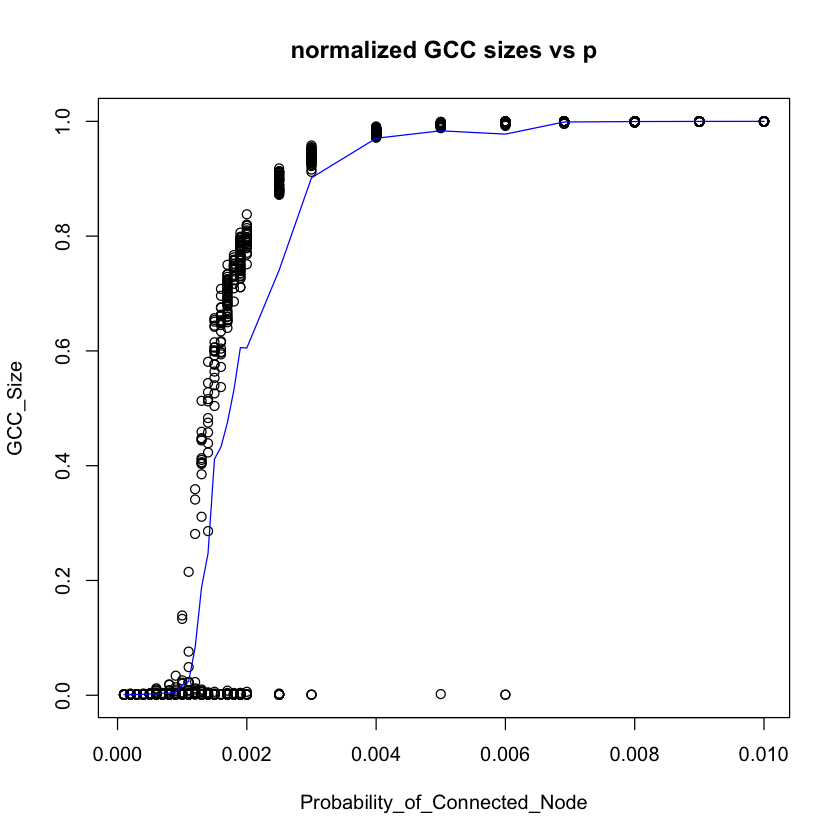

In [181]:
n = 1000
prob_list = c(0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,  0.0017, 0.0018, 0.0019, 0.002, 0.0025, 0.003, 0.004, 0.005, 0.006, 0.00690775527, 0.008, 0.009,  0.01)
# prob_list = c(0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.00690775527)

prob_len = length(prob_list)
iter = 100
GCC_Size = c(1:prob_len*iter)
Probability_of_Connected_Node = c(1:prob_len*iter)
avg_gcc = c(1:prob_len)

for (i in 1:prob_len){
    gcc_list = c(1:iter)
    for (j in 1:iter){
        g_np = sample_gnp(n=n, p=prob_list[i], directed = FALSE)
        gcc = clusters(g_np)$csize[1]/n
        gcc_list[j] = gcc
        GCC_Size[i*j] = gcc
        Probability_of_Connected_Node[i*j] = prob_list[i]
    }
    avg_gcc[i] = mean(gcc_list)
}
plot(Probability_of_Connected_Node, GCC_Size, main="normalized GCC sizes vs p") #, ylim=c(0.995,1))
lines(prob_list,avg_gcc,col="blue")

Define the average degree of nodes c = n × p = 0.5. Sweep over the number of nodes, n, ranging from 100 to 10000. Plot the expected size of the GCC of ER networks with n nodes and edge-formation probabilities p = c/n, as a function of n. What trend is observed?

[[1]]
[1] 0